In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.6.0
 Built: Sep 28 2023 12:02:17

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



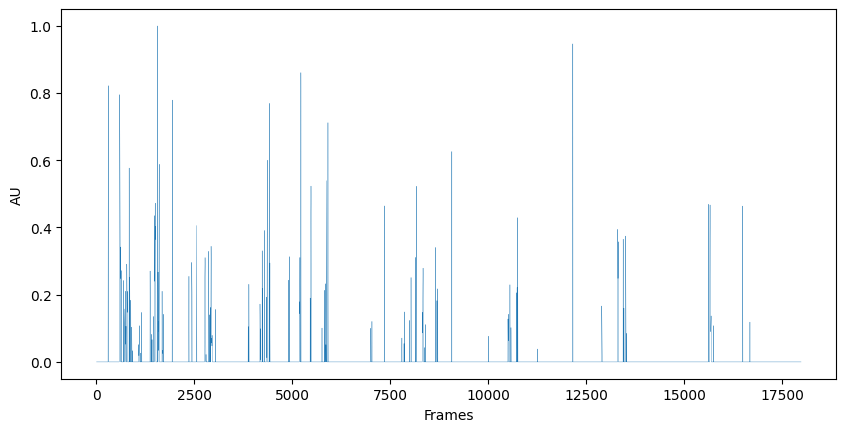

In [38]:
df = pd.read_csv('/Volumes/hpc/modelling/nest/DATA/raw/spikes/experiment3_unfiltered_raw.csv')
row = df.iloc[25].values[1:]
ts = np.arange(1, len(row) + 1)

fig = plt.figure(figsize=(10, 4.8))
plt.xlabel('Frames')
plt.ylabel('AU')
plt.plot(ts, row, linewidth = 0.25)
plt.show()
